In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import sqrt

In [11]:
n_insured = 3

X = {"x1": [0.5, 0.1, 0.2, 0.2, 0.0],
     "x2": [0.6, 0.2, 0.1, 0.0, 0.1],
     "x3": [0.6, 0.0, 0.1, 0.2, 0.1]}
X = pd.DataFrame(X, index = [0,1,2,3,4])
X

,x1,x2,x3
0,0.5,0.6,0.6
1,0.1,0.2,0.0
2,0.2,0.1,0.1
3,0.2,0.0,0.2
4,0.0,0.1,0.1


In [12]:
f2 = X[["x1","x2"]]

def convolution(X, damage, change):
    # Correcting for P(x2 = 0) & P(x1 = 0)
    probability = 0
    # Lower and Upper bounds to be moving throughout the iteration
    start_x2 = damage if damage <= max(X.index) else max(X.index)
    start_x1 = abs(min(max(X.index) - damage, 0))
    # We want to shift positions: x2 should end where x1 starts 
    # and viceversa
    current_x2 = start_x2
    current_x1 = start_x1

    # Take X1 downwards, X2 upwards
    while current_x1 <= start_x2:
        f1x = X.iloc[current_x1,0]
        f2x = X.iloc[current_x2,1]
        probability += f1x*f2x

        print("{}·{} ".format(round(f1x,2), round(f2x,2)),end="")
        current_x1 += change
        current_x2 -= change
    return probability

In [13]:
f2_conv = []
for i in range(9):
    print("f2({})".format(i),end=": ")
    prob = convolution(f2, damage=i, change=1)
    f2_conv.append(prob)
    print("= {}".format(round(prob,4)), "\n")

f2(0): 0.5·0.6 = 0.3 

f2(1): 0.5·0.2 0.1·0.6 = 0.16 

f2(2): 0.5·0.1 0.1·0.2 0.2·0.6 = 0.19 

f2(3): 0.5·0.0 0.1·0.1 0.2·0.2 0.2·0.6 = 0.17 

f2(4): 0.5·0.1 0.1·0.0 0.2·0.1 0.2·0.2 0.0·0.6 = 0.11 

f2(5): 0.1·0.1 0.2·0.0 0.2·0.1 0.0·0.2 = 0.03 

f2(6): 0.2·0.1 0.2·0.0 0.0·0.1 = 0.02 

f2(7): 0.2·0.1 0.0·0.0 = 0.02 

f2(8): 0.0·0.1 = 0.0 



In [14]:
# Take the convolution, append to x3 0 initial probabilities for the remaining length
f3 = {"x1": f2_conv,
      "x3": np.append(X.x3.values, np.repeat(0, len(f2_conv) - len(X.x3)))}

f3 = pd.DataFrame(f3)
f3.x1

0    0.30
1    0.16
2    0.19
3    0.17
4    0.11
5    0.03
6    0.02
7    0.02
8    0.00
Name: x1, dtype: float64

In [15]:
f3_conv = []
for i in range(17):
    print("f3({:>2})".format(i),end=": ")
    prob = convolution(f3, damage=i, change=1)
    f3_conv.append(prob)
    print("= {}".format(round(prob,4)), "\n")
f3_conv = pd.DataFrame({"f(3)": f3_conv})

f3( 0): 0.3·0.6 = 0.18 

f3( 1): 0.3·0.0 0.16·0.6 = 0.096 

f3( 2): 0.3·0.1 0.16·0.0 0.19·0.6 = 0.144 

f3( 3): 0.3·0.2 0.16·0.1 0.19·0.0 0.17·0.6 = 0.178 

f3( 4): 0.3·0.1 0.16·0.2 0.19·0.1 0.17·0.0 0.11·0.6 = 0.147 

f3( 5): 0.3·0.0 0.16·0.1 0.19·0.2 0.17·0.1 0.11·0.0 0.03·0.6 = 0.089 

f3( 6): 0.3·0.0 0.16·0.0 0.19·0.1 0.17·0.2 0.11·0.1 0.03·0.0 0.02·0.6 = 0.076 

f3( 7): 0.3·0.0 0.16·0.0 0.19·0.0 0.17·0.1 0.11·0.2 0.03·0.1 0.02·0.0 0.02·0.6 = 0.054 

f3( 8): 0.3·0.0 0.16·0.0 0.19·0.0 0.17·0.0 0.11·0.1 0.03·0.2 0.02·0.1 0.02·0.0 0.0·0.6 = 0.019 

f3( 9): 0.16·0.0 0.19·0.0 0.17·0.0 0.11·0.0 0.03·0.1 0.02·0.2 0.02·0.1 0.0·0.0 = 0.009 

f3(10): 0.19·0.0 0.17·0.0 0.11·0.0 0.03·0.0 0.02·0.1 0.02·0.2 0.0·0.1 = 0.006 

f3(11): 0.17·0.0 0.11·0.0 0.03·0.0 0.02·0.0 0.02·0.1 0.0·0.2 = 0.002 

f3(12): 0.11·0.0 0.03·0.0 0.02·0.0 0.02·0.0 0.0·0.1 = 0.0 

f3(13): 0.03·0.0 0.02·0.0 0.02·0.0 0.0·0.0 = 0.0 

f3(14): 0.02·0.0 0.02·0.0 0.0·0.0 = 0.0 

f3(15): 0.02·0.0 0.0·0.0 = 0.0 

f3(16): 0.0·0.0 = 

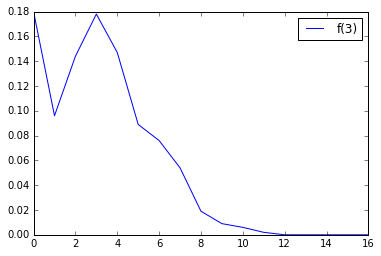

In [16]:
f3_conv.plot()
plt.show()

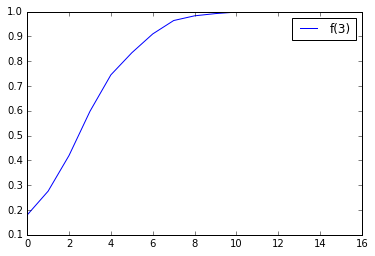

In [17]:
f3_conv.cumsum().plot()
plt.show()

$$
    \text{Risk Premium} = \frac{\mathbb{E}(s)}{\text {# Insured}} = \frac{\sum^{n}_{i=1}\mathbb{E}(x_i)}{\text {# Insured}}
$$

In [48]:
Es = sum(f3_conv.values.flatten() * f3_conv.index) # Expectation
risk_premium = Es / n_insured
E2s = sum(f3_conv.values.flatten() * f3_conv.index**2)
Vs = E2s - Es**2 # Variance
c_var = sqrt(Vs)/Es

# Risk Premium at 95% confiability
M = f3_conv.cumsum().iloc[6:8,0]; m = np.subtract(*M.index) / np.subtract(*M.values)
conf_95 = m * (0.95 - M.values[0]) + M.index[0]#; conf_95 /= n_insured

print("E[s] = {:.4f}".format(Es))
print("V(s) = {:.4f}".format(Vs))
print("Prima de Riesgo: {:.4f}".format(risk_premium))
print("Coeficiente de Variación: {:.4f}".format(c_var))
print("Prima Recargada: ${:.2f}".format(risk_premium * (1 + c_var)))
print("Prima 95% confianza: ${:.2f}".format(conf_95 * (1 + c_var)))

E[s] = 3.1000
V(s) = 5.4100
Prima de Riesgo: 1.0333
Coeficiente de Variación: 0.7503
Prima Recargada: $1.81
Prima 95% confianza: $11.80


In [47]:
M.values[0]

0.91000000000000003